<a href="https://colab.research.google.com/github/SammyBoy-09/Tree-Species-Classification/blob/main/Tree_Species_Classification_(Samuel_Lazar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tree Species Classification

### Description:
######This project is done in view of the 4-weeks Shell-Edunet Skills4Future Internship by ~
#Samuel Lazar

###Loading Tools and Dataset

In [1]:
#Importing kaggle library to colab python
! pip install kaggle

#Make a kaggle directory in Colab
! mkdir ~/.kaggle

#Copy the uploaded kaggle.json to this kaggle directory in colab
! cp kaggle.json ~/.kaggle/

#Provide rights for your colab to communicate with kaggle
! chmod 600 ~/.kaggle/kaggle.json

Download kaggle dataset from the link: https://www.kaggle.com/datasets/viditgandhi/tree-species-identification-dataset


In [2]:
! kaggle datasets download -d viditgandhi/tree-species-identification-dataset

Dataset URL: https://www.kaggle.com/datasets/viditgandhi/tree-species-identification-dataset
License(s): apache-2.0
  0% 0.00/72.8M [00:00<?, ?B/s]
100% 72.8M/72.8M [00:00<00:00, 1.20GB/s]


In [3]:
! unzip tree-species-identification-dataset.zip

Archive:  tree-species-identification-dataset.zip
  inflating: Tree_Species_Dataset/.git/HEAD  
  inflating: Tree_Species_Dataset/.git/config  
  inflating: Tree_Species_Dataset/.git/description  
  inflating: Tree_Species_Dataset/.git/hooks/applypatch-msg.sample  
  inflating: Tree_Species_Dataset/.git/hooks/commit-msg.sample  
  inflating: Tree_Species_Dataset/.git/hooks/fsmonitor-watchman.sample  
  inflating: Tree_Species_Dataset/.git/hooks/post-update.sample  
  inflating: Tree_Species_Dataset/.git/hooks/pre-applypatch.sample  
  inflating: Tree_Species_Dataset/.git/hooks/pre-commit.sample  
  inflating: Tree_Species_Dataset/.git/hooks/pre-merge-commit.sample  
  inflating: Tree_Species_Dataset/.git/hooks/pre-push.sample  
  inflating: Tree_Species_Dataset/.git/hooks/pre-rebase.sample  
  inflating: Tree_Species_Dataset/.git/hooks/pre-receive.sample  
  inflating: Tree_Species_Dataset/.git/hooks/prepare-commit-msg.sample  
  inflating: Tree_Species_Dataset/.git/hooks/push-to-check

### Exploring the Dataset

####List All Classes

In [11]:
import os

data_dir = "/content/Tree_Species_Dataset"
classes = sorted([folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))])
print(f"Number of classes: {len(classes)}")
print("Classes:\n", classes)

Number of classes: 31
Classes:
 ['.ipynb_checkpoints', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


####Plot Sample Images from Each Class

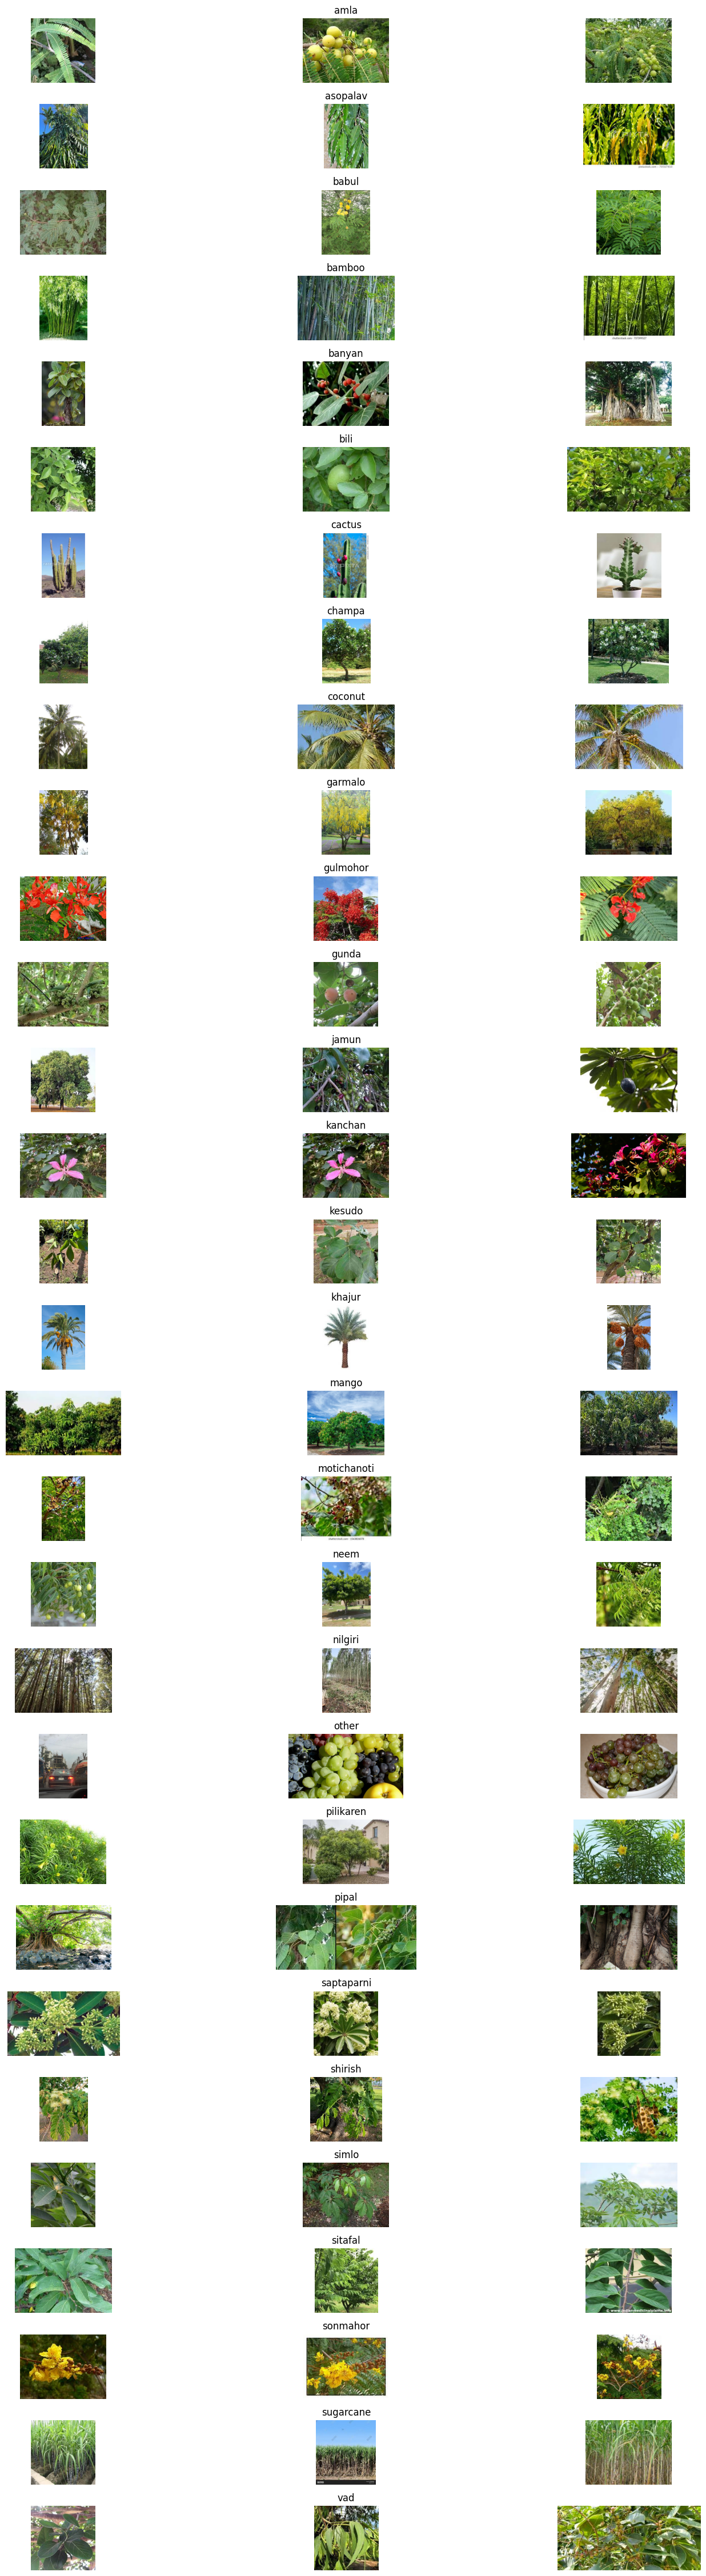

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_class_samples(data_dir, classes, samples_per_class=3):
    plt.figure(figsize=(15, len(classes)*1.5))
    for class_index, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)[:samples_per_class]
        for i, image_name in enumerate(images):
            img_path = os.path.join(class_path, image_name)
            img = mpimg.imread(img_path)
            plt.subplot(len(classes), samples_per_class, class_index * samples_per_class + i + 1)
            plt.imshow(img)
            plt.axis('off')
            if i == 1:  # Center image
                plt.title(class_name)
    plt.tight_layout()
    plt.show()

plot_class_samples(data_dir, classes, samples_per_class=3)


####Image Count per Class (Data Imbalance Check)

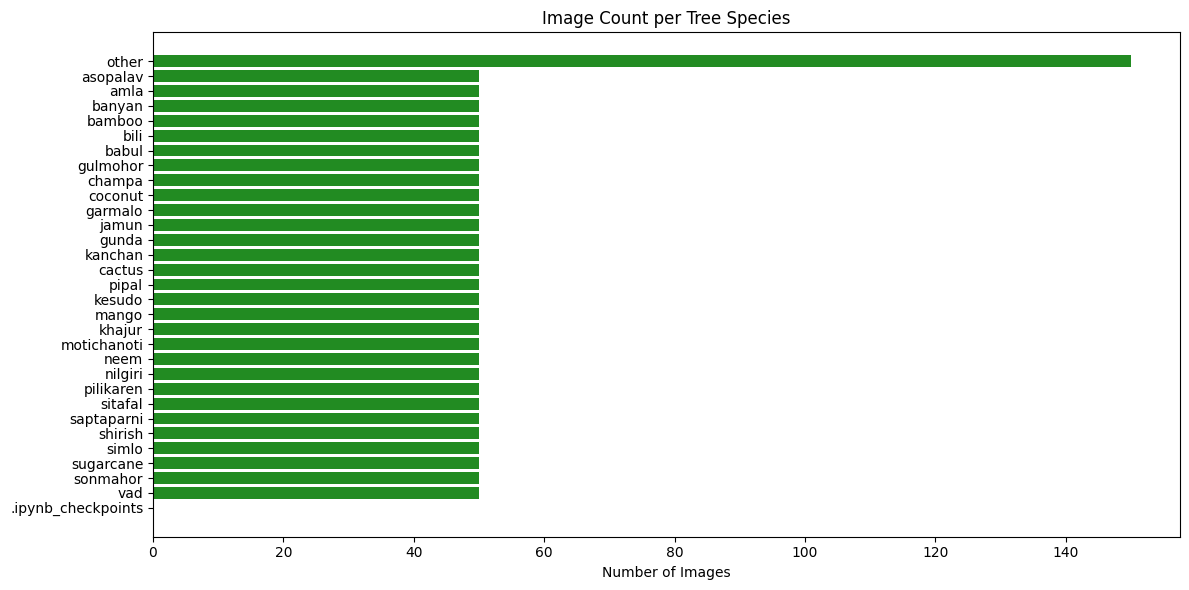

In [10]:
import pandas as pd

image_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
df_counts = pd.DataFrame(list(image_counts.items()), columns=["Class", "Image Count"])
df_counts = df_counts.sort_values(by="Image Count", ascending=False)

# Bar plot
plt.figure(figsize=(12,6))
plt.barh(df_counts["Class"], df_counts["Image Count"], color='forestgreen')
plt.xlabel("Number of Images")
plt.title("Image Count per Tree Species")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


####Image Size Distribution

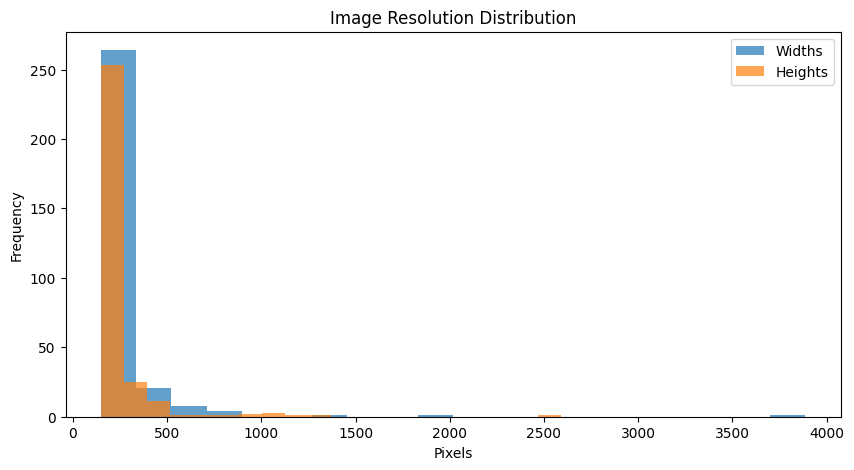

In [9]:
from PIL import Image
import numpy as np

image_shapes = []

for class_name in classes:
    class_folder = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_folder)[:10]:  # sample 10 per class to save time
        image_path = os.path.join(class_folder, image_name)
        with Image.open(image_path) as img:
            image_shapes.append(img.size)  # (width, height)

# Convert to numpy for plotting
widths, heights = zip(*image_shapes)

plt.figure(figsize=(10, 5))
plt.hist(widths, bins=20, alpha=0.7, label='Widths')
plt.hist(heights, bins=20, alpha=0.7, label='Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Image Resolution Distribution')
plt.legend()
plt.show()
